In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import heatmap


In [6]:
df = pd.read_csv('/content/drive/MyDrive/datasets/E-commerce Customer Behavior - Sheet1.csv')

df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [8]:
df['Satisfaction Level'].value_counts()

Satisfied      125
Unsatisfied    116
Neutral        107
Name: Satisfaction Level, dtype: int64

In [9]:
# Dropping unnecessary columns
columns_to_drop = ['Customer ID']  # Update this list as needed
df_cleaned = df.drop(columns=columns_to_drop)


In [10]:
# Removing duplicate rows
df_cleaned = df_cleaned.drop_duplicates()


In [11]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)


Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


In [12]:
mode_satisfaction = df_cleaned['Satisfaction Level'].mode()[0]
df_cleaned['Satisfaction Level'].fillna(mode_satisfaction, inplace=True)


In [14]:
# Convert boolean columns to numerical (if needed)
df_cleaned['Discount Applied'] = df_cleaned['Discount Applied'].astype(int)  # Convert True/False to 1/0


In [16]:
df_cleaned.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,1,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,0,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,1,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,0,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,1,55,Unsatisfied


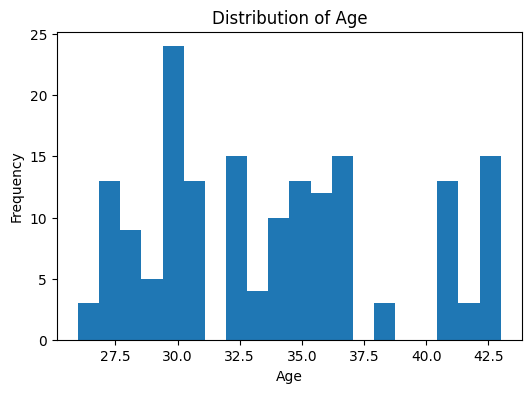

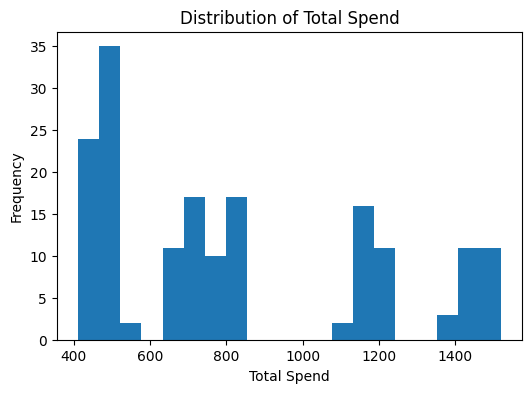

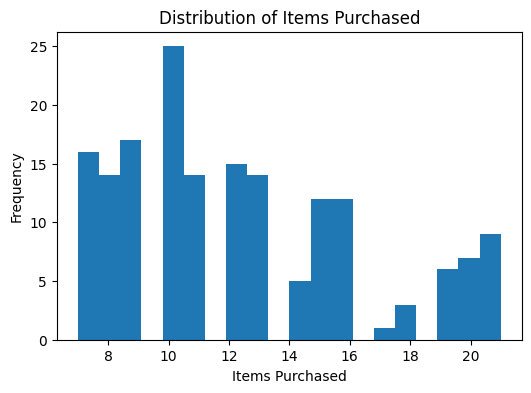

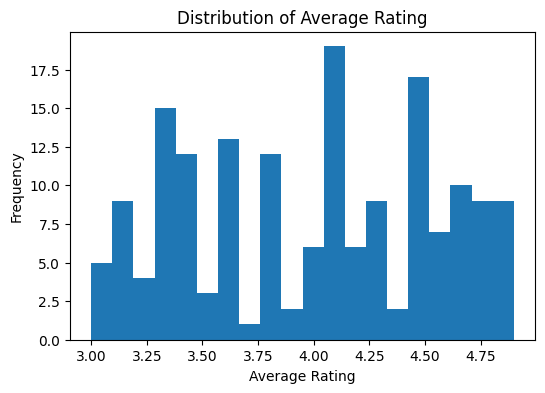

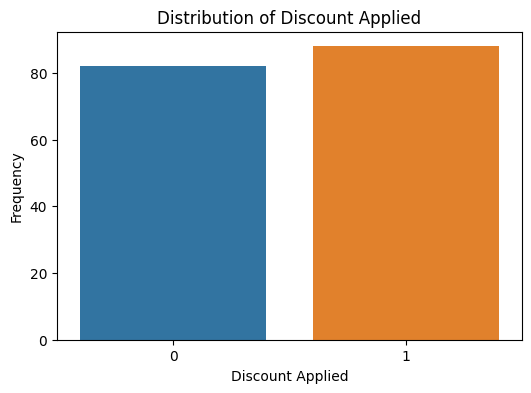

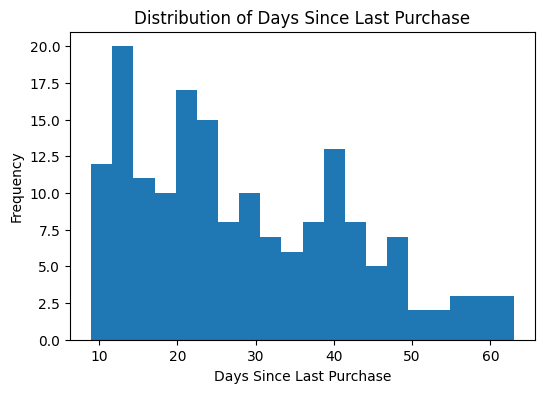

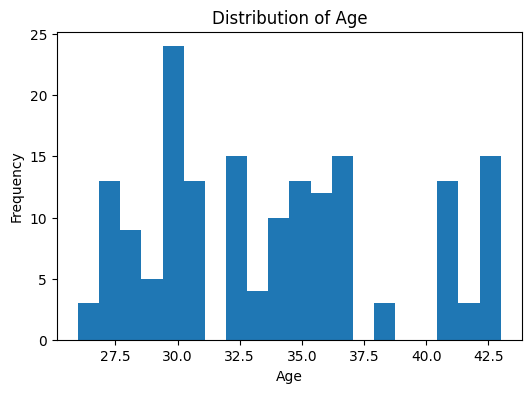

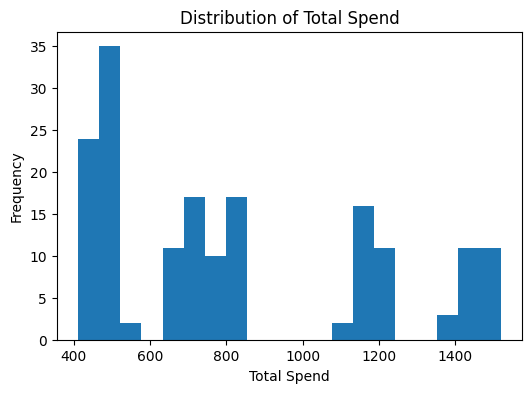

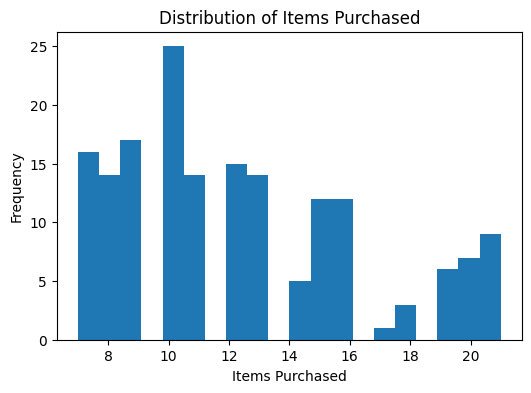

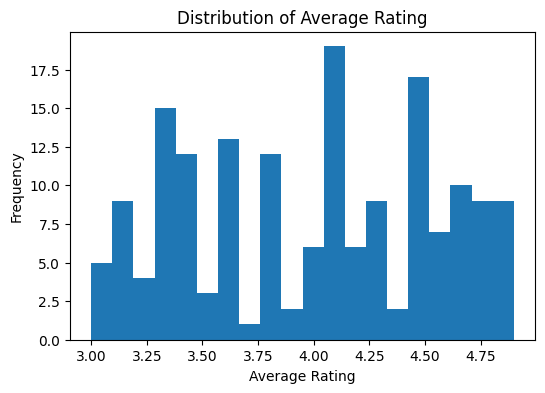

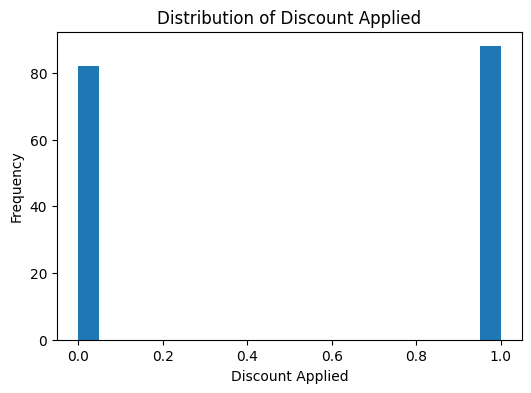

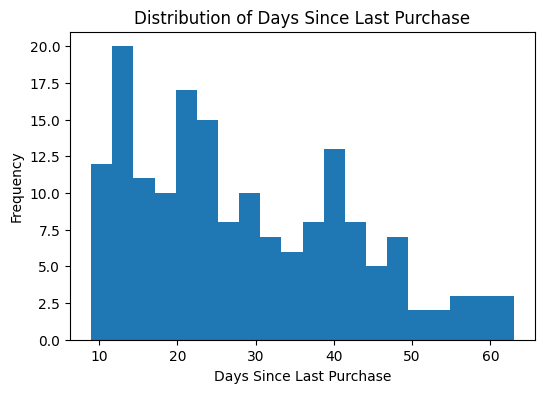

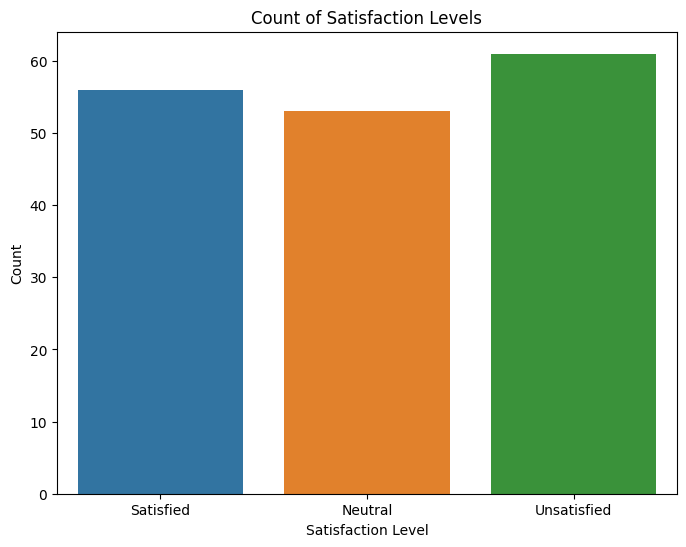

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing each feature
for column in df_cleaned.columns:
    if df_cleaned[column].dtype != 'object':  # Plot only numerical columns
        plt.figure(figsize=(6, 4))
        if df_cleaned[column].nunique() > 2:  # If not boolean
            plt.hist(df_cleaned[column], bins=20)
        else:  # If boolean, use countplot
            sns.countplot(x=column, data=df_cleaned)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Visualizing each feature
for column in df_cleaned.columns:
    if df_cleaned[column].dtype != 'object':  # Plot only numerical columns
        plt.figure(figsize=(6, 4))
        plt.hist(df_cleaned[column], bins=20)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# For categorical variables, use bar plots or count plots
# For instance:
plt.figure(figsize=(8, 6))
sns.countplot(x='Satisfaction Level', data=df_cleaned)
plt.title('Count of Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()


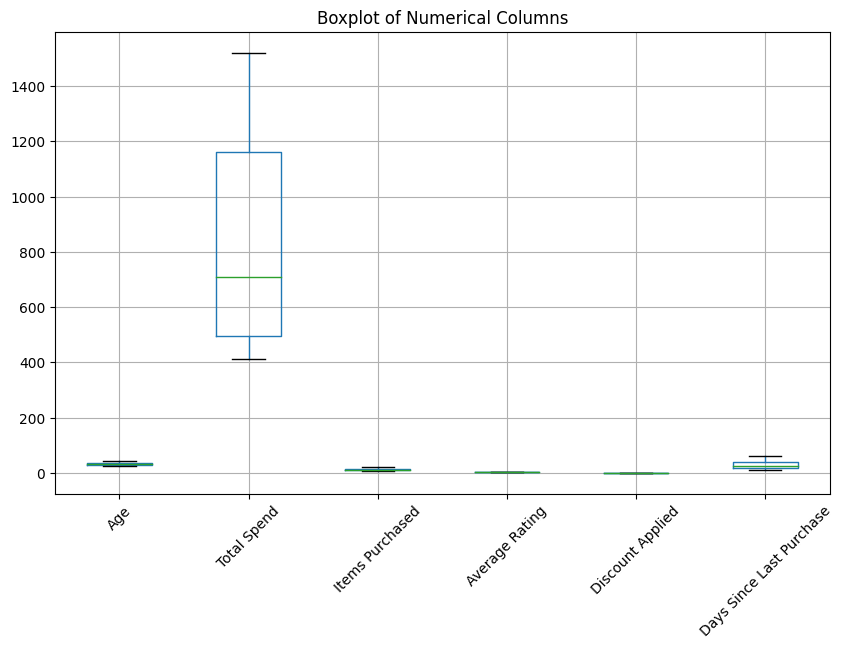

In [18]:
plt.figure(figsize=(10, 6))
df_cleaned.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()
